In [ ]:
%pip install scikit-learn
%pip install hdbscan
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install numpy
%pip install yellowbrick
%pip install tqdm

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from hdbscan import HDBSCAN
import hdbscan
from sklearn.metrics import DistanceMetric, silhouette_score, confusion_matrix
from scipy.spatial import distance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
# from paretochart.paretochart import pareto
from yellowbrick.features import PCA as ybPCA
from sklearn.manifold import TSNE
from scipy.stats import shapiro
from tqdm.auto import tqdm

c:\Users\ander\OneDrive\Documentos\Pós Graduação\MIT em IA, ML e DL\Projetos das disciplinas\Validação de modelos de clusterização\24E2\ValidacaoModelosClusterizacao\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Escolha de base de dados

 #### 1 - Explique a motivação de uso da base escolhida.
 #### 2 - Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.
 Foi escolhida uma base cujos dados são características de smartphones, com 2000 entradas correspondendo a diferentes modelos. O 'label'
 dos dados corresponde à faixa de preço dos modelos ('price-range'), com valores númericos inteiros entre 1 e 4, em ordem crescente de preço.
 Me interessei nessa base pelo escopo de trabalho da minha área de trabalho, que inclui as homologações de novos modelos de smartphones,
 o que envolve lista de testes com critérios que variam de acordo com a classi cação do smartphone de nida pelo time de Marketing, sendo os
 testes feitos em várias iterações conforme falhas são encontradas e correções no software são elaboradas pelos fabricantes. Minha entrada
 no mercado de Telecom foi executando testes desse tipo, embora não tenha mais esse escopo de trabalho, teria facilidade em interpretar os
 dados.
 Considerei a possibilidade de uso de dados reais no problema, mas não há uma disponibilização dos resultados dos testes na minha empresa
 de modo a permitir alimentar um modelo de classi cação. Os relatórios são em PDF, e os resultados são descritos apenas como ‘PASSOU’ ou
 ‘NÃO PASSOU’, os valores numéricos dos resultados sendo mantidos pelos diferentes testadores.
 Foi utilizada a base disponível em 
https://www.kaggle.com/code/hritikroshanmishra/price-range-classi er. Essa base não possui um dicionário
 de dados, e foi necessário recuperar o sentido de cada variável a partir dos comentários e códigos disponíveis na plataforma Kaggle

In [3]:
smartphones = pd.read_csv('../data/dados_classificacao_smartphones.csv')
smartphones = smartphones.drop(columns=['blue','dual_sim','four_g','pc','three_g','touch_screen','wifi'])
smartphones_treated = smartphones.drop(smartphones[smartphones['sc_w'] < 2].index)
smartphones_treated = smartphones_treated.drop(smartphones_treated[smartphones_treated['px_height'] < 100].index)

In [4]:
smartphones_treated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1490 entries, 1 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1490 non-null   int64  
 1   clock_speed    1490 non-null   float64
 2   fc             1490 non-null   int64  
 3   int_memory     1490 non-null   int64  
 4   m_dep          1490 non-null   float64
 5   mobile_wt      1490 non-null   int64  
 6   n_cores        1490 non-null   int64  
 7   px_height      1490 non-null   int64  
 8   px_width       1490 non-null   int64  
 9   ram            1490 non-null   int64  
 10  sc_h           1490 non-null   int64  
 11  sc_w           1490 non-null   int64  
 12  talk_time      1490 non-null   int64  
 13  price_range    1490 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 174.6 KB


In [5]:
smartphones_treated['price_range'].value_counts()

price_range
2    379
3    374
1    372
0    365
Name: count, dtype: int64

#### 3 - Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?


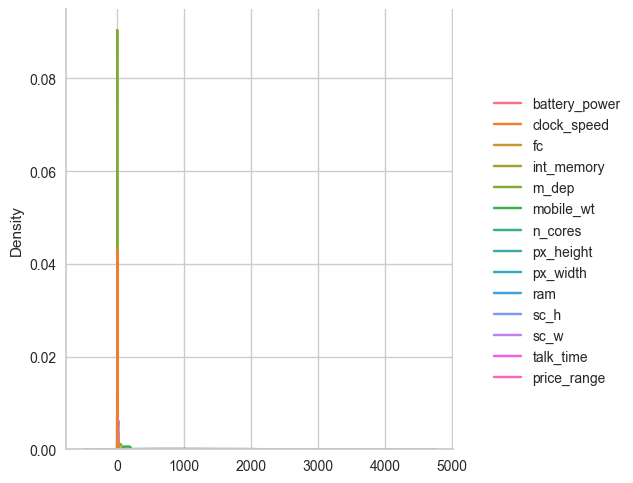

In [6]:
sns.displot(smartphones_treated, kind="kde")

A faixa dinâmica dos dados não está homogênea entre as diferentes variáveis. É necessário fazer o escalonamento das variáveis.

In [7]:
scaler = StandardScaler()
smartphones_scaled = scaler.fit_transform(smartphones_treated)

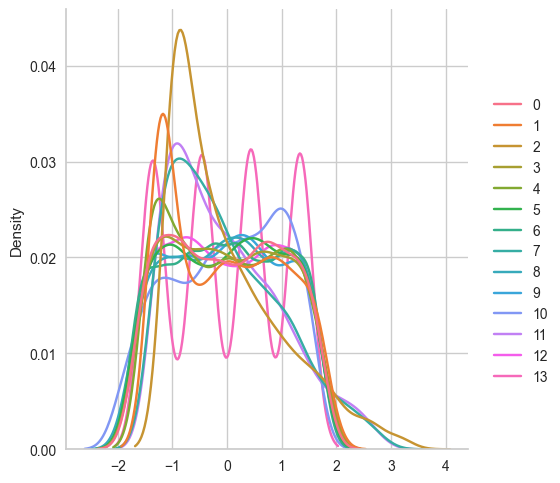

In [8]:
sns.displot(smartphones_scaled, kind="kde")

#### 4 - Realize o pré-processamento adequado dos dados. Descreva os passos necessários.

Além do escalonamento feito acima, seria necessário lidar com variáveis categóricas, caso elas existissem na base escolhida. Uma maneira de se fazer isso seria com o uso do ONE HOT ENCODING, onde aumenta-se o número de features (colunas) presentes nos dados, onde cada categoria é represnetada por uma feature dedicada.

## Clusterização

#### Para os dados pré-processados da etapa anterior você irá:

Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas K-Médias e DBScan.

#### K-MEANS

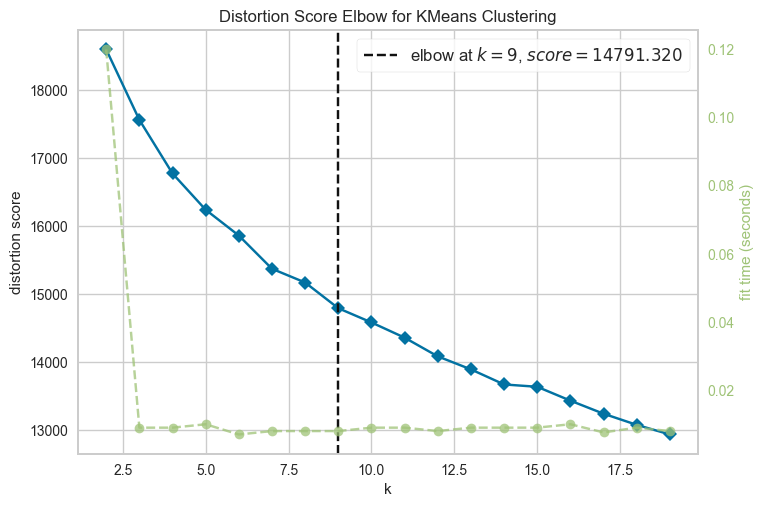

In [10]:
kmeans = KMeans()

model = KElbowVisualizer(kmeans, k=(2, 20))
model.fit(smartphones_scaled)

model.show();

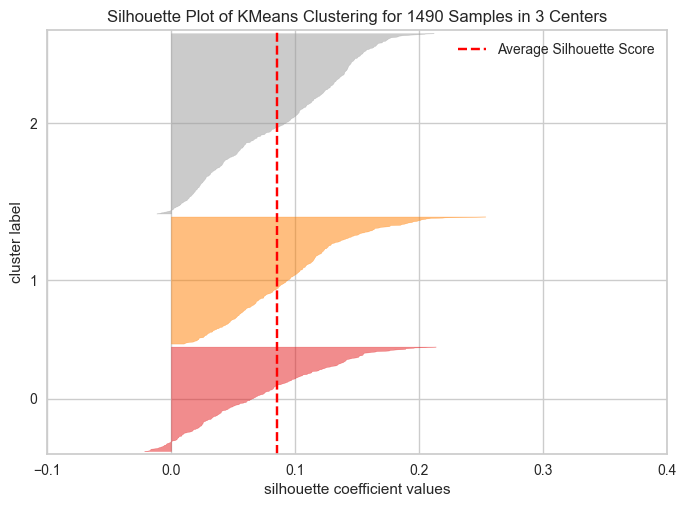

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1490 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
model = SilhouetteVisualizer(kmeans)
model.fit(smartphones_scaled)
model.show()

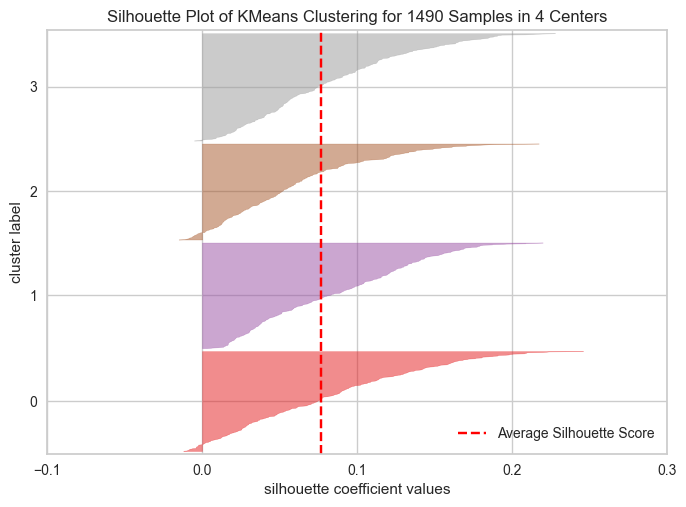

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1490 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
model = SilhouetteVisualizer(kmeans)
model.fit(smartphones_scaled)
model.show()

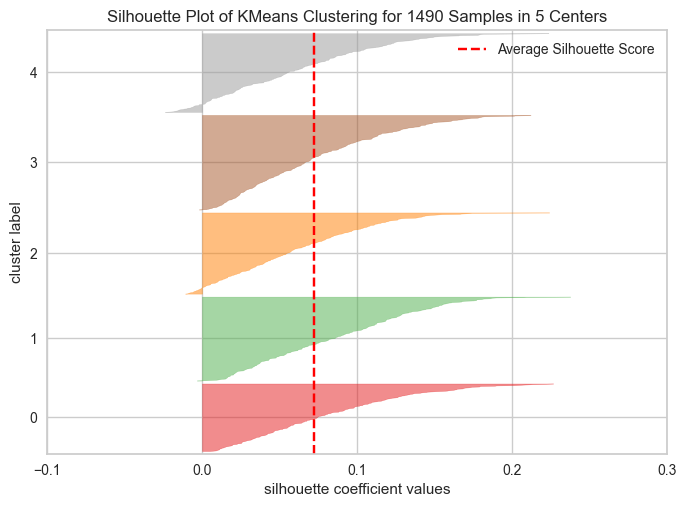

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1490 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
model = SilhouetteVisualizer(kmeans)
model.fit(smartphones_scaled)
model.show()

Pelos gráficos de silhueta acima, as classes mais bem distribuídas ocorrem com 4 clusters. Esse é o valor escolhido para o problema em questão.

#### DBSCAN

In [ ]:
choices = range(1,30)
for eps in choices:
  dbscan = DBSCAN(min_samples=3, eps=eps)

  dbscan_clusters = dbscan.fit_predict(smartphones_scaled)

  print(f"{eps} -> {np.unique(dbscan_clusters)} :  {np.bincount(dbscan_clusters + 1 )}")

#### 2 - Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.

-----

#### 3 - Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

-----

#### 4 - Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.

-----

#### 5 - Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?

Não, a silhueta não é indicada para lidar com clusterizações feitas por DBSCAN. O motivo é que o DBSCAN não cria necessariamente clusters esféricos, como é o caso para o algoritmo K-means.

A definição do índice de silhueta, utilizando a compactação dos clusters (medida da distância de cada elemento de um cluster ao centróide deste) e a separação entre clusters vizinhos (média da distância de cada elemento de um cluster a cada elemento do cluster vizinho mais próximo) supõe clusters esféricos, ou seja, há a expectativa de que uma boa clusterização envolve deixar os pontos de um cluster mais próximo de pontos do seu próprio cluster do que de pontos de um cluster adjacente, o que não é necessariamente uma característica de clusters côncavos.

Para lidar com clusterizações feitas utilizando o DBSCAN, o método CVNN é uma melhor opção para a avaliação da clusterização e definição do número de clusters ótimo.



## Medidas de similaridade

  #### 1 - Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

Entende-se do problema que cada série temporal corresponde a um elemento diferente do conjunto de dados, e o objetivo é agrupar esses elementos em 3 clusters diferentes.

Passo 1:

   Construção da matriz M de correlação entre as séries temporais.  Sendo N o número de elementos, a matriz M é de dimensão NxN, cada entrada corespondente a uma determinada linha e coluna associadas indicam o valor máximo da correlação entre as séries temporais correspondentes.

Passo 2 :

   Uso de um algoritmo de clusterização, por exemplo o K-Médias, que será alimentado com os dados da matriz de similiaridade.

Passo 3:

   Executar a seleção dos parâmetros (número de clusters) utilizando os métodos apropriados, como a análise da silhueta.


#### 2 - Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

Usaria o K-means, uma vez que o meu conjunto de dados nesse caso fica bem reduzido, sendo somente as correlações entre as séries temporais.

### 3 - Indique um caso de uso para essa solução projetada.

Um caso de uso para séries temporais que eu tenho familiaridade por conta do trabalho é o agrupamento de conjuntos de elementos de rede móvel que sejam propícios a receberem a mesma configuração. Os elementos de rede, nesse caso, seriam caracterizados pelas curvas de carga ao longo de determinado tempo, e o agrupamento permite identificar quais elementos são semehlantes o suficiente para receber a mesma configuração, na expectativa de otimizar determinada métrica (por exemplo, a taxa máxima de transmissão observada em um período).

#### 4 - Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

-----

----

-----